In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

import numpy as np
import matplotlib.pylab as plt

from matplotlib import rcParams
rcParams['figure.figsize'] = 15,6

from src import data
import mne

!date -I

ModuleNotFoundError: No module named 'src'

In [6]:
%ls {data.path('external/annen_tms_eeg_ebrains')}

data-descriptor_a3dade301e9f.pdf  sub-S02/  sub-S05/  sub-S08/  sub-S11/
participants.csv                  sub-S03/  sub-S06/  sub-S09/  sub-S12/
sub-S01/                          sub-S04/  sub-S07/  sub-S10/


In [7]:
data_dir = data.path('external/annen_tms_eeg_ebrains')

In [10]:
raw = mne.io.read_raw_eximia(f"{data_dir}/sub-S01/sub-S01.nxe", preload=False, verbose=None)

Loading sub-S01.nxe


In [14]:
raw.get_channel_types()[:6]

['stim', 'stim', 'stim', 'eog', 'eeg', 'eeg']

In [60]:
trigger_channels = raw.ch_names[:3]

In [61]:
trigger_channels

['GateIn', 'Trig1', 'Trig2']

In [62]:
triggers = raw.get_data(picks=trigger_channels)

1000 s ~ 16 minutes..

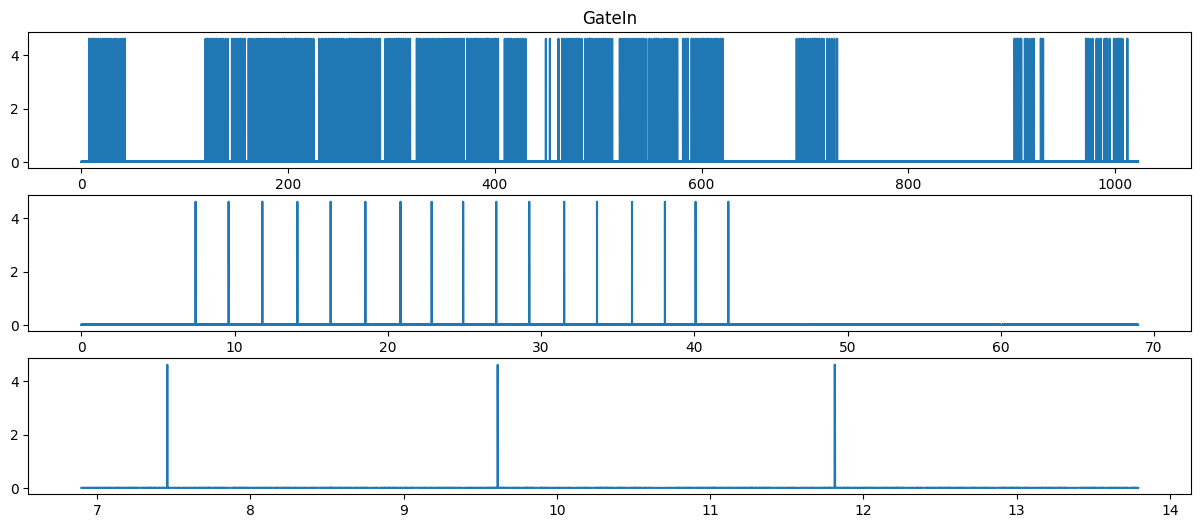

In [63]:
trig = 0
fig, axs = plt.subplots(nrows=3, sharey=True)
axs[0].plot(raw.times[:], triggers[trig, :])
axs[0].set(title=trigger_channels[trig])
axs[1].plot(raw.times[:100_000], triggers[trig, :100_000])
axs[2].plot(raw.times[10_000:20_000], triggers[trig, 10_000:20_000])

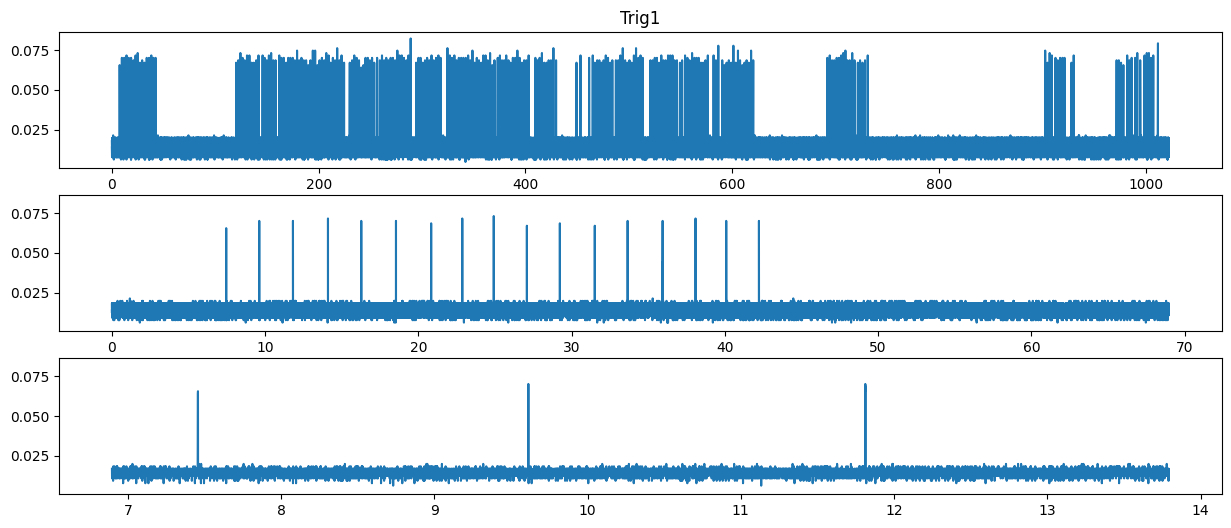

In [64]:
trig = 1
fig, axs = plt.subplots(nrows=3, sharey=True)
axs[0].plot(raw.times[:], triggers[trig, :])
axs[0].set(title=trigger_channels[trig])
axs[1].plot(raw.times[:100_000], triggers[trig, :100_000])
axs[2].plot(raw.times[10_000:20_000], triggers[trig, 10_000:20_000])

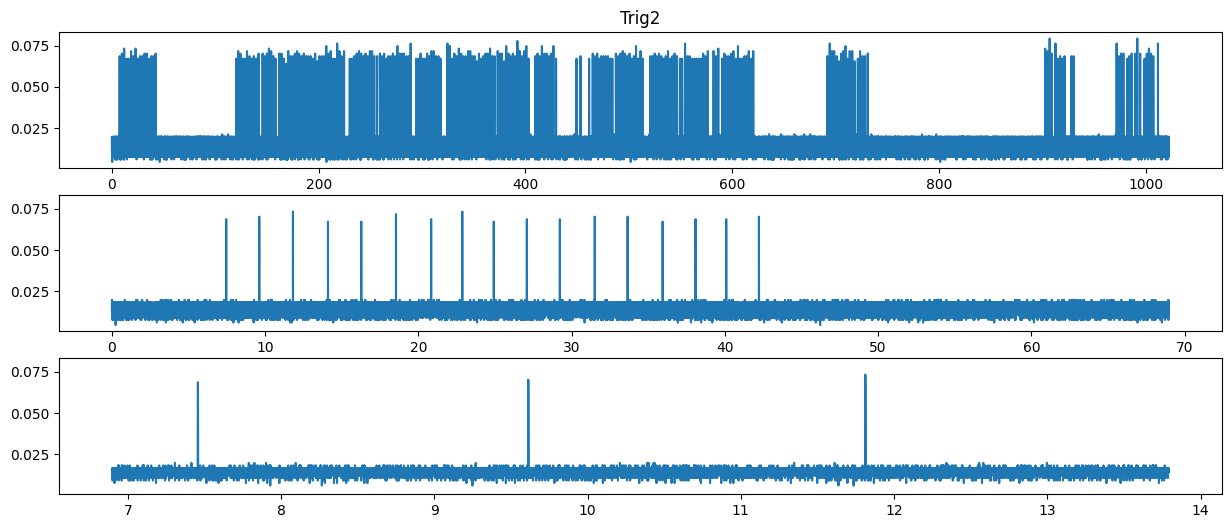

In [66]:
trig = 2
fig, axs = plt.subplots(nrows=3, sharey=True)
axs[0].plot(raw.times[:], triggers[trig, :])
axs[0].set(title=trigger_channels[trig])
axs[1].plot(raw.times[:100_000], triggers[trig, :100_000])
axs[2].plot(raw.times[10_000:20_000], triggers[trig, 10_000:20_000])

In [67]:
events = mne.find_events(raw, stim_channel="GateIn", min_duration=2/raw.info['sfreq'])

267 events found
Event IDs: [4]
